#### This project aims to determine the reasons why customers are leaving a certain bank.  It aims to determine what are the common attributes of customers leaving and staying

In [2]:
#Importing Libraries #

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
import seaborn as sn

 # Users who were 60 days enrolled, churn in the next 30
dataset = pd.read_csv('customer_satisfaction.csv')

##### CHECK IF RECORDS ARE CORRECTLY IMPORTED

In [3]:
dataset.head(5) # Viewing the Data

,USER_ID,GENDER,IS_SATISFIED,AGE,OWN_HOUSE,CREDIT_SCORE,DEPOSIT,WITHDRAWAL,PURCHASE_PARTNERS,PURCHASES,...,LOAN_WAITING,LOAN_CANCELLED,LOAN_RECEIVED,LOAN_REJECT,ZODIAC_SIGN,LEFT_TWO_MONTH_PLUS,LEFT_AFTER_A_MONTH,REWARD_EARNED,REWARD_RATE,IS_REFERRED
0,55409,M,0,37,na,NaN,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,F,0,28,R,486.0,0,0,1,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,M,0,35,R,561.0,47,2,86,47,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,M,0,26,R,567.0,26,3,38,25,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,M,1,27,na,NaN,0,0,2,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [10]:
dataset.tail(5) # Viewing the Data

,USER_ID,GENDER,IS_SATISFIED,AGE,OWN_HOUSE,CREDIT_SCORE,DEPOSIT,WITHDRAWAL,PURCHASE_PARTNERS,PURCHASES,...,LOAN_WAITING,LOAN_CANCELLED,LOAN_RECEIVED,LOAN_REJECT,ZODIAC_SIGN,LEFT_TWO_MONTH_PLUS,LEFT_AFTER_A_MONTH,REWARD_EARNED,REWARD_RATE,IS_REFERRED
26995,24291,M,1,24,R,580.0,0,0,0,0,...,0,0,0,0,Leo,0,0,32.0,1.07,1
26996,4116,F,1,26,na,NaN,0,0,2,0,...,0,0,0,1,Cancer,1,0,2.0,0.67,0
26997,23740,M,0,22,na,NaN,0,0,37,0,...,0,0,0,0,Taurus,0,0,28.0,0.93,0
26998,47663,F,1,46,na,529.0,2,0,16,2,...,0,0,0,0,Aries,1,0,27.0,0.90,1
26999,52752,M,1,34,na,525.0,0,0,4,0,...,0,0,0,0,Cancer,0,0,4.0,0.13,0


In [11]:
dataset.columns

Index(['USER_ID', 'GENDER', 'IS_SATISFIED', 'AGE', 'OWN_HOUSE', 'CREDIT_SCORE',
       'DEPOSIT', 'WITHDRAWAL', 'PURCHASE_PARTNERS', 'PURCHASES',
       'PAYMENT_CARDS', 'CC_RECOMMEND', 'CC_DISLIKED', 'CC_LIKED',
       'CC_APPLICATION_BEGIN', 'APP_DOWNLOADED', 'WEB_USER', 'APP_WEB_USER',
       'IOS_USER', 'ANDRIOD_USER', 'TOT_PHONE_REG', 'PAYMENT_TYPE',
       'LOAN_WAITING', 'LOAN_CANCELLED', 'LOAN_RECEIVED', 'LOAN_REJECT',
       'ZODIAC_SIGN', 'LEFT_TWO_MONTH_PLUS', 'LEFT_AFTER_A_MONTH',
       'REWARD_EARNED', 'REWARD_RATE', 'IS_REFERRED'],
      dtype='object')

#### CHECK DATA STATISTICS

In [4]:
# Distribution of Numerical Variables
dataset.describe() 

,USER_ID,IS_SATISFIED,AGE,CREDIT_SCORE,DEPOSIT,WITHDRAWAL,PURCHASE_PARTNERS,PURCHASES,PAYMENT_CARDS,CC_RECOMMEND,...,TOT_PHONE_REG,LOAN_WAITING,LOAN_CANCELLED,LOAN_RECEIVED,LOAN_REJECT,LEFT_TWO_MONTH_PLUS,LEFT_AFTER_A_MONTH,REWARD_EARNED,REWARD_RATE,IS_REFERRED
count,27000.000000,27000.000000,27000.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.220148,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964457,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


#### CLEANING OF DATA
This proces is to maintain the quality of data which is important in making accurate analysis and boost the value of the data quality, to save time and increase importance of the insights generated from the data analysis

On the sample data, there are two columns with null values (CREDIT_SCORE, REWARD_EARNED) and the total rows affected CREDIT_SCORE-8031(rows) and REWARD_EARNED-3227(rows) are too many, imputation might not help, it is more efficient to drop the columns as a whole

In [14]:
dataset.isna().any()

USER_ID                 False
GENDER                  False
IS_SATISFIED            False
AGE                     False
OWN_HOUSE               False
CREDIT_SCORE             True
DEPOSIT                 False
WITHDRAWAL              False
PURCHASE_PARTNERS       False
PURCHASES               False
PAYMENT_CARDS           False
CC_RECOMMEND            False
CC_DISLIKED             False
CC_LIKED                False
CC_APPLICATION_BEGIN    False
APP_DOWNLOADED          False
WEB_USER                False
APP_WEB_USER            False
IOS_USER                False
ANDRIOD_USER            False
TOT_PHONE_REG           False
PAYMENT_TYPE            False
LOAN_WAITING            False
LOAN_CANCELLED          False
LOAN_RECEIVED           False
LOAN_REJECT             False
ZODIAC_SIGN             False
LEFT_TWO_MONTH_PLUS     False
LEFT_AFTER_A_MONTH      False
REWARD_EARNED            True
REWARD_RATE             False
IS_REFERRED             False
dtype: bool

In [15]:
dataset.isna().sum()

USER_ID                    0
GENDER                     0
IS_SATISFIED               0
AGE                        0
OWN_HOUSE                  0
CREDIT_SCORE            8031
DEPOSIT                    0
WITHDRAWAL                 0
PURCHASE_PARTNERS          0
PURCHASES                  0
PAYMENT_CARDS              0
CC_RECOMMEND               0
CC_DISLIKED                0
CC_LIKED                   0
CC_APPLICATION_BEGIN       0
APP_DOWNLOADED             0
WEB_USER                   0
APP_WEB_USER               0
IOS_USER                   0
ANDRIOD_USER               0
TOT_PHONE_REG              0
PAYMENT_TYPE               0
LOAN_WAITING               0
LOAN_CANCELLED             0
LOAN_RECEIVED              0
LOAN_REJECT                0
ZODIAC_SIGN                0
LEFT_TWO_MONTH_PLUS        0
LEFT_AFTER_A_MONTH         0
REWARD_EARNED           3227
REWARD_RATE                0
IS_REFERRED                0
dtype: int64

##### REMOVE CREDIT_SCORE and REWARD_EARNED
REMOVE CREDIT_SCORE 8031/27000 = 30% of null data on this column 
REWARD_EARNED       3227/27000 = 10% of data in this column is not useful

In [3]:
dataset_eda = dataset.drop(columns = ['CREDIT_SCORE', 'REWARD_EARNED'])

#### HISTOGRAM ANALYSIS
This process it to get a quick information about the data distribution without detailed statistical analysis. It requires to ddrop the columns not necessasy for the histogram analysis. At a high level, it gives idea on the data for possible anomaly

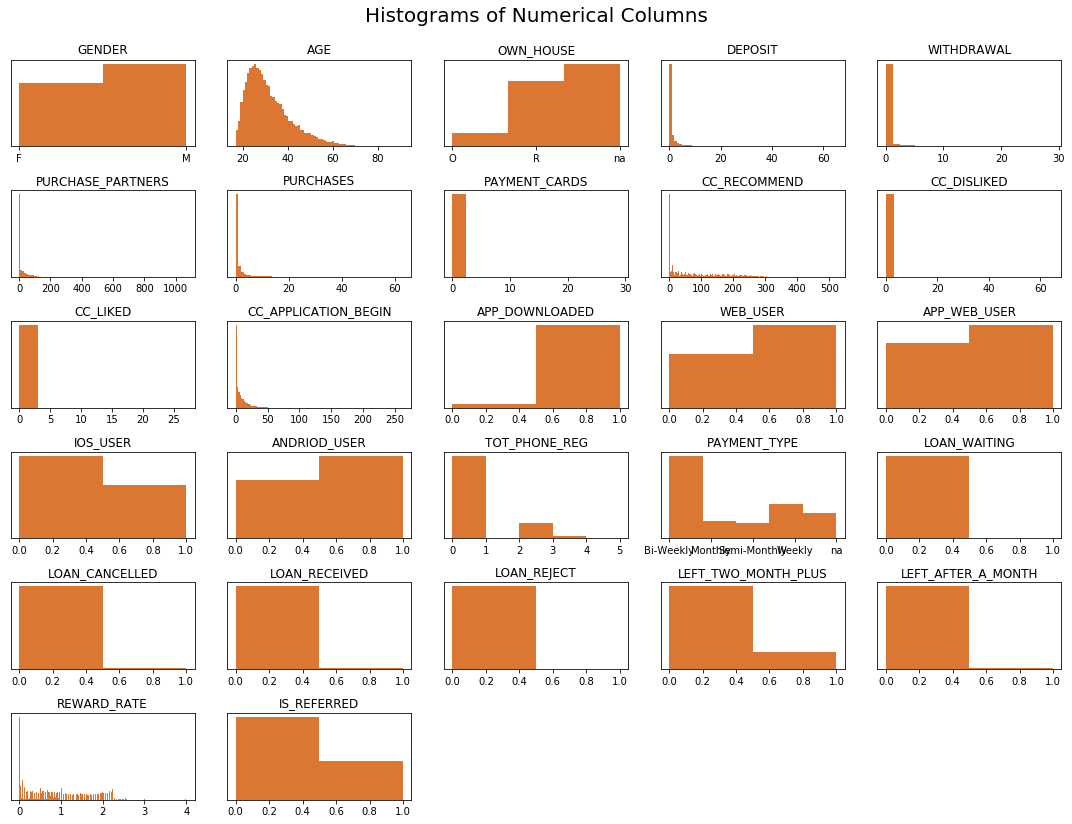

In [18]:
dataset_eda2 = dataset_eda.drop(columns = ['USER_ID', 'IS_SATISFIED','ZODIAC_SIGN'])
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(1, dataset_eda2.shape[1] + 1):
    plt.subplot(6, 5, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset_eda2.columns.values[i - 1])

    vals = np.size(dataset_eda2.iloc[:, i - 1].unique())
    
    plt.hist(dataset_eda2.iloc[:, i - 1], bins=vals, color='#dc7633')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

#### PIE CHART ANALYSIS
This process is to understand the data proportions of the different data categories. It is to ensure that there will be no imbalance on the data categories

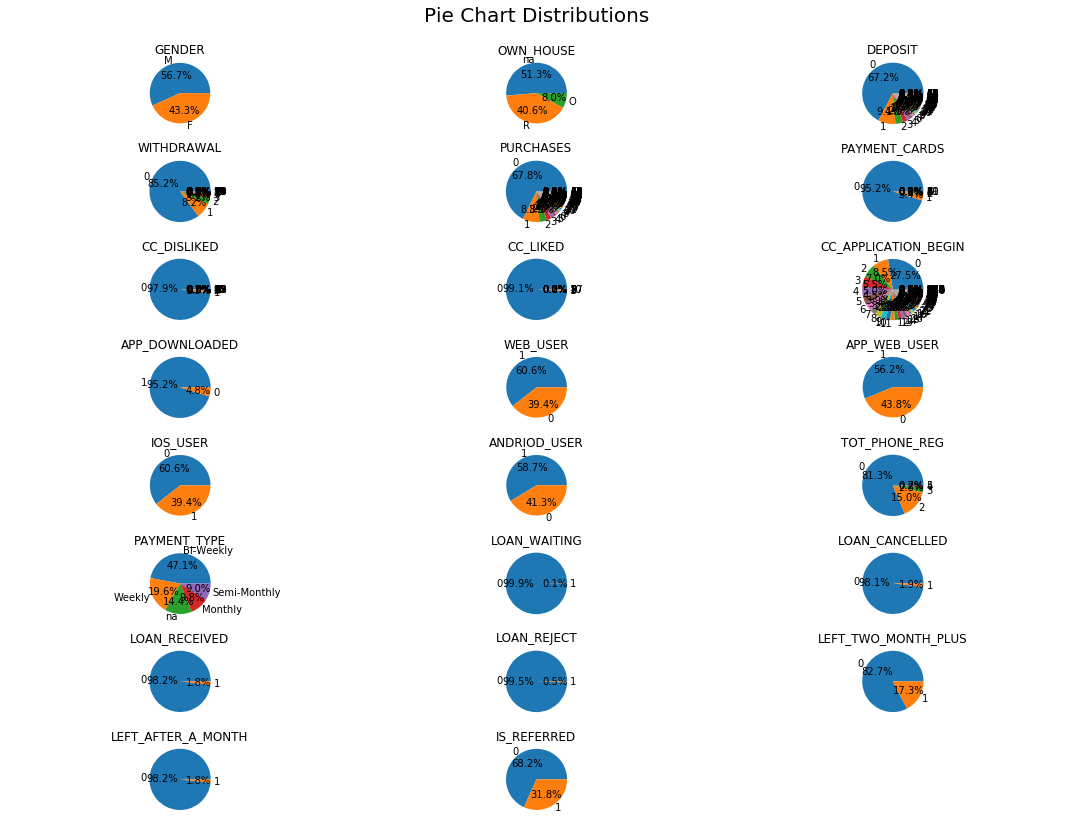

In [19]:
dataset_eda2 = dataset_eda[['GENDER', 'OWN_HOUSE',
       'DEPOSIT', 'WITHDRAWAL', 'PURCHASES',
       'PAYMENT_CARDS', 'CC_DISLIKED', 'CC_LIKED',
       'CC_APPLICATION_BEGIN', 'APP_DOWNLOADED', 'WEB_USER', 'APP_WEB_USER',
       'IOS_USER', 'ANDRIOD_USER', 'TOT_PHONE_REG', 'PAYMENT_TYPE',
       'LOAN_WAITING', 'LOAN_CANCELLED', 'LOAN_RECEIVED', 'LOAN_REJECT',
        'LEFT_TWO_MONTH_PLUS', 'LEFT_AFTER_A_MONTH',
        'IS_REFERRED']]
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Pie Chart Distributions', fontsize=20)
for i in range(1, dataset_eda2.shape[1] + 1):
    plt.subplot(8, 3, i)
    f = plt.gca()
    f.axes.get_yaxis().set_visible(False)
    f.set_title(dataset_eda2.columns.values[i - 1])
   
    values = dataset_eda2.iloc[:, i - 1].value_counts(normalize = True).values
    index = dataset_eda2.iloc[:, i - 1].value_counts(normalize = True).index
    plt.pie(values, labels = index, autopct='%1.1f%%')
    plt.axis('equal')
fig.tight_layout(rect=[0, 0.03, 1, 0.95])

#### EXPLORE THE UNEVEN FEATURES
The LOAN_WAITING, LOAN_CANCELLED, LOAN_RECEIVED and LOAN_REJECT columns have uneven distribution, it need further analysis to verify if these could drive the satisfaction of customers

In [173]:
dataset_eda[dataset_eda.LOAN_WAITING == 1].IS_SATISFIED.value_counts()

0    27
1     8
Name: IS_SATISFIED, dtype: int64

In [122]:
dataset_eda[dataset_eda.LOAN_CANCELLED == 1].IS_SATISFIED.value_counts()

1    274
0    234
Name: SATISFIED, dtype: int64

In [174]:
dataset_eda[dataset_eda.LOAN_RECEIVED == 1].IS_SATISFIED.value_counts()

1    292
0    199
Name: IS_SATISFIED, dtype: int64

In [175]:
dataset_eda[dataset_eda.LOAN_REJECT == 1].IS_SATISFIED.value_counts()

1    107
0     25
Name: IS_SATISFIED, dtype: int64

In [176]:
dataset_eda[dataset_eda.LEFT_AFTER_A_MONTH == 1].IS_SATISFIED.value_counts()

1    266
0    222
Name: IS_SATISFIED, dtype: int64

#### CORRELATION WITH RESPONSE (IS_SATISFIED)
This prodivde education insight on how the data categories are correlated on the possible predictors of the the model

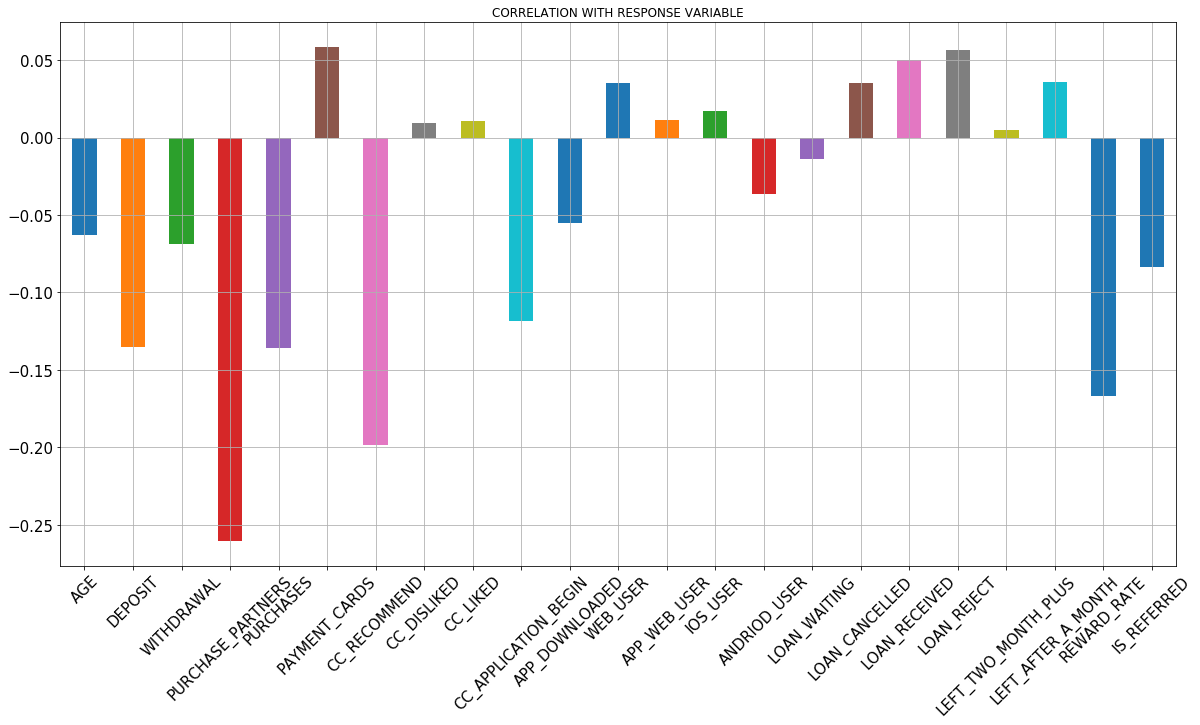

In [12]:
dataset_eda.drop(columns = ['USER_ID','OWN_HOUSE','PAYMENT_TYPE',
                         'TOT_PHONE_REG', 'ZODIAC_SIGN','GENDER','IS_SATISFIED']
    ).corrwith(dataset.IS_SATISFIED).plot.bar(figsize=(20,10),
              title = 'CORRELATION WITH RESPONSE VARIABLE',
              fontsize = 15, rot = 45,
              grid = True)

### HEATMAP (CHECK ANY CORRELATION)
This process is to check the correation matrix to show how correlated are the variables with each other

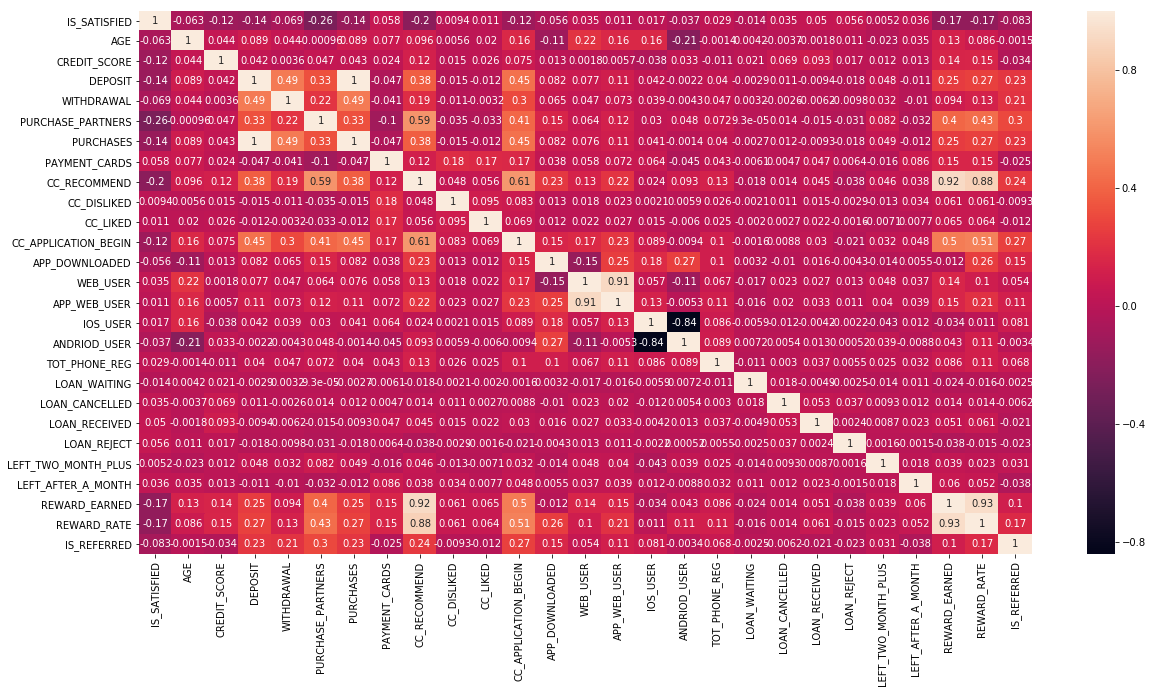

In [13]:
dataset_eda2 = dataset.drop(columns = ['USER_ID'])
plt.figure(figsize=(20,10)) 
sn.heatmap(dataset_eda2.corr(), annot=True) 

#### CORRELATION INVESTIGATION
There is a strong correlation on the following variables
IOS_USER vs ANDROID_USER and APP_WEB_USER vs WEB_USER. In this example, it is better to remove any of them

Note: Although there are somewhat correlated fields, they are not collinear. These feature are not functions of each other, so they won't break the model. These feature won't help much either, however let feature selection process to eliminate them

In [ ]:
dataset = dataset.drop(columns = ['APP_WEB_USER'])

#### FINALIZE THE EDA AND PRODUCE THE CLEAN DATA (INPUT TO MODEL)

In [4]:
dataset_eda.to_csv('new_customer_satisfaction.csv', index = False)